In [6]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

def custom_func(ln_x, ln_q):
    x_val = (np.exp(1.5/( ( 0.1 * ((ln_x + 7)**2) ) + 1) )/(np.log(np.exp(ln_q) + 0.007) + 5) + np.exp(-1*(ln_x+12)/5) + 1)*((np.exp(0.5*ln_q))) + 5
    return x_val

data = pd.read_csv("./custom_func_data/6-points.csv")
data_4 = pd.read_csv("./custom_func_data/4-points.csv")
data3 = pd.read_csv("./custom_func_data/linear.csv")
data['6_point_interpolator'] = data['xf']
data['4_point_interpolator'] = data_4['xf']
data['linear_interpolator'] = data3['xf']
data_edge = pd.read_csv("./custom_func_data/slope-edge.csv")
data_avg = pd.read_csv("./custom_func_data/avg_slope_inter.csv")
data_mini_spline = pd.read_csv("./custom_func_data/slope_zero.csv")
data['edge_slope_interpolator'] = data_edge['xf']
data['avg_slope_interpolator'] = data_avg['xf']
data['mini_spline_interpolator'] = data_mini_spline['xf']
  
data.drop('xf', axis = 1)

data['actual_function'] = custom_func(data['lnx'],data['lnq'])

data['6_point_ratio'] = data['6_point_interpolator']/data['actual_function']
data['4_point_ratio'] = data['4_point_interpolator']/data['actual_function']
data['linear_ratio'] = data['linear_interpolator']/data['actual_function']
data['edge_ratio'] = data['edge_slope_interpolator']/data['actual_function']
data['avg_ratio'] = data['avg_slope_interpolator']/data['actual_function']
data['mini_spline_ratio'] = data['mini_spline_interpolator']/data['actual_function']

data

lnx   lnq        xf  6_point_interpolator  4_point_interpolator  \
0      -18.00  0.50   10.8521               10.8521               10.8521   
1      -17.99  0.50   10.8438               10.8438               10.8438   
2      -17.98  0.50   10.8354               10.8354               10.8354   
3      -17.97  0.50   10.8270               10.8270               10.8270   
4      -17.96  0.50   10.8187               10.8187               10.8187   
...       ...   ...       ...                   ...                   ...   
341995  -0.05  9.95  173.7450              173.7450              173.7450   
341996  -0.04  9.95  173.7100              173.7100              173.7100   
341997  -0.03  9.95  173.6760              173.6760              173.6760   
341998  -0.02  9.95  173.6420              173.6420              173.6420   
341999  -0.01  9.95  173.6080              173.6080              173.6080   

        linear_interpolator  edge_slope_interpolator  avg_slope_interpolator  \
0                   10.8521                  10.8521                 10.8521   
1                   10.8438                  10.8438                 10.8438   
2                   10.8354                  10.8354                 10.8354   
3                   10.8270                  10.8270                 10.8270   
4                   10.8187                  10.8187                 10.8187   
...                     ...                      ...                     ...   
341995             173.7450                 173.7450                173.7450   
341996             173.7100                 173.7100                173.7100   
341997             173.6760                 173.6760                173.6760   
341998             173.6420                 173.6420                173.6420   
341999             173.6080                 173.6080                173.6080   

        mini_spline_interpolator  actual_function  6_point_ratio  \
0                        10.4784        10.808720       1.004013   
1                        10.4376        10.800253       1.004032   
2                        10.4012        10.791803       1.004040   
3                        10.3690        10.783370       1.004046   
4                        10.3408        10.774954       1.004060   
...                          ...              ...            ...   
341995                  183.4090       175.535121       0.989802   
341996                  183.6600       175.500955       0.989795   
341997                  183.9800       175.466872       0.989794   
341998                  184.3710       175.432871       0.989792   
341999                  184.8360       175.398953       0.989789   

        4_point_ratio  linear_ratio  edge_ratio  avg_ratio  mini_spline_ratio  
0            1.004013      1.004013    1.004013   1.004013           0.969439  
1            1.004032      1.004032    1.004032   1.004032           0.966422  
2            1.004040      1.004040    1.004040   1.004040           0.963806  
3            1.004046      1.004046    1.004046   1.004046           0.961573  
4            1.004060      1.004060    1.004060   1.004060           0.959707  
...               ...           ...         ...        ...                ...  
341995       0.989802      0.989802    0.989802   0.989802           1.044856  
341996       0.989795      0.989795    0.989795   0.989795           1.046490  
341997       0.989794      0.989794    0.989794   0.989794           1.048517  
341998       0.989792      0.989792    0.989792   0.989792           1.050949  
341999       0.989789      0.989789    0.989789   0.989789           1.053803  

[342000 rows x 16 columns]

In [7]:
graphing = [data[i:i+1800].reset_index() for i in range(0,342000,1800)]
data2 = data.sort_values(['lnx','lnq'], ascending = True, ignore_index = True)
graphing2 = [data2[i:i+190].reset_index() for i in range(0,342000,190)]

In [8]:
graphing2

[     index   lnx   lnq        xf  6_point_interpolator  4_point_interpolator  \
 0        0 -18.0  0.50   10.8521               10.8521               10.8521   
 1        1 -18.0  0.55   10.9990               10.9990               10.9990   
 2        2 -18.0  0.60   11.1458               11.1458               11.1458   
 3        3 -18.0  0.65   11.2926               11.2926               11.2926   
 4        4 -18.0  0.70   11.4395               11.4395               11.4395   
 ..     ...   ...   ...       ...                   ...                   ...   
 185    185 -18.0  9.75  582.2920              582.2920              582.2920   
 186    186 -18.0  9.80  595.3220              595.3220              595.3220   
 187    187 -18.0  9.85  608.3520              608.3520              608.3520   
 188    188 -18.0  9.90  621.3820              621.3820              621.3820   
 189    189 -18.0  9.95  634.4120              634.4120              634.4120   
 
      linear_interpolator 

In [12]:
ratio_list = ['6_point_ratio','4_point_ratio','linear_ratio','edge_ratio','avg_ratio','a','mini_spline_ratio']
interpolator_list = ['6_point_interpolator','4_point_interpolator','linear_interpolator','edge_slope_interpolator','avg_slope_interpolator','actual_function','mini_spline_interpolator']
labels = ['6 point interpolator', '4 point interpolator', 'linear interpolator', 'edge slope interpolator', 'avg slope interpolator', 'actual function', 'mini spline interpolator']
index =4
index2 = 1

In [13]:
for dat in graphing:
    if(dat['lnq'][0]==9.8 or dat['lnq'][0]==6.3):
        figure, axis = plt.subplots(2,2 , gridspec_kw={'height_ratios': [4, 1]})
        figure.set_size_inches(12, 7)
        axis[0,0].plot(dat['lnx'], dat[interpolator_list[index]] , color='blue',  label = labels[index])
        axis[0,0].plot(dat['lnx'], dat['actual_function'] , color='red',   label = 'analytic function')
        axis[0,0].plot(dat['lnx'], dat[interpolator_list[index2]] , color='green',   label = labels[index2])
        axis[0,0].legend()
        axis[0,0].set(xlabel = "ln(x)")
        axis[0,0].set_title("ln(q) is " + str(dat['lnq'][0]))
#         print("ln(q) is " , (dat['lnq'][0]))

        i=-18
        while(i<0):
            axis[0,0].axvline(x=i,ymax = 0.025,color='grey')
            i+=0.2

        axis[1,0].plot(dat['lnx'], dat[ratio_list[index]] , color='blue',   label = labels[index])
        axis[1,0].plot(dat['lnx'], dat[ratio_list[index2]] , color='red',   label = labels[index2])
        axis[1,0].legend()
        axis[1,0].set_title("ratio")
        axis[1,0].set(xlabel = "ln(x)")
#         plt.xlim(-15,-14.8)
        i=-18
        while(i<0):
            axis[1,0].axvline(x=i,ymax = 0.025,color='grey')
            i+=0.2
        axis[1,0].set_ylim([0.99999,1.00001])

#         SECOND PART
        axis[0,1].plot(dat['lnx'], dat[interpolator_list[index]] , color='black',  label = labels[index])
        axis[0,1].plot(dat['lnx'], dat['actual_function'] , color='red',   label = 'analytic function')
        axis[0,1].plot(dat['lnx'], dat[interpolator_list[index2]] , color='green',   label = labels[index2])
        axis[0,1].legend()
        axis[0,1].set(xlabel = "ln(x)")
        axis[0,1].set_title("ln(q) is " + str(dat['lnq'][0]))
        axis[0,1].set_xlim([-15,-14.8])
        if(dat['lnq'][0]==6.3):
            axis[0,1].set_ylim([71.5,73.5])
        else:
            axis[0,1].set_ylim([385,396])

        i=-18
        while(i<0):
            axis[0,1].axvline(x=i,ymax = 0.025,color='grey')
            i+=0.2

        axis[1,1].plot(dat['lnx'], dat[ratio_list[index]] , color='blue',   label = labels[index])
        axis[1,1].plot(dat['lnx'], dat[ratio_list[index2]] , color='red',   label = labels[index2])
        axis[1,1].set_title("ratio")
        axis[1,1].set(xlabel = "ln(x)")
        axis[1,1].set_xlim([-15,-14.8])
        axis[1,1].legend()
        i=-18
        while(i<0):
            axis[1,1].axvline(x=i,ymax = 0.025,color='grey')
            i+=0.2
#         axis[1,1].set_ylim([0.9,1.1])
        figure.tight_layout(pad=2.0)
        plt.show()

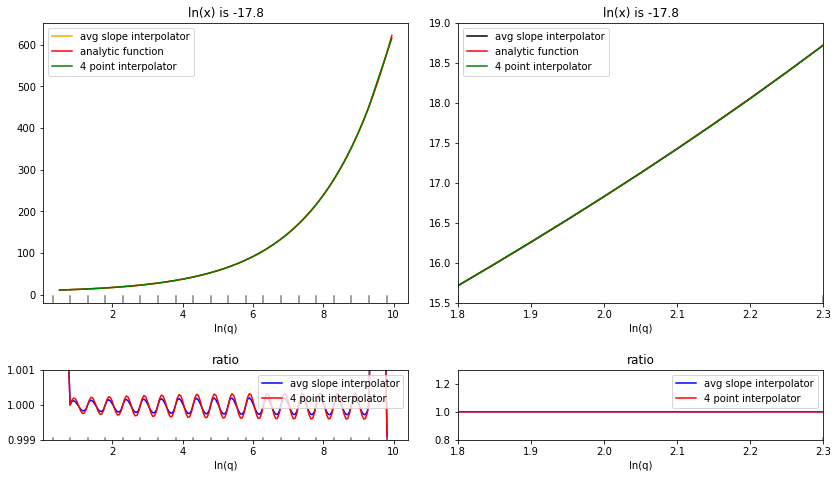

In [14]:
for dat in graphing2:
    if(dat['lnx'][0]==-17.8 or dat['lnx'][0]==-9.0):
        figure, axis = plt.subplots(2,2 , gridspec_kw={'height_ratios': [4, 1]})
        figure.set_size_inches(12, 7)
        axis[0,0].plot(dat['lnq'], dat[interpolator_list[index]] , color='orange',  label = labels[index])
        axis[0,0].plot(dat['lnq'], dat['actual_function'] , color='red',   label = 'analytic function')
        axis[0,0].plot(dat['lnq'], dat[interpolator_list[index2]] , color='green',   label = labels[index2])
        axis[0,0].legend()
        axis[0,0].set(xlabel = "ln(q)")
        axis[0,0].set_title("ln(x) is " + str(dat['lnx'][0]))
#         axis[0,0].set_ylim([-500,500])
#         print("ln(q) is " , (dat['lnq'][0]))

        i=0.3
        while(i<10):
            axis[0,0].axvline(x=i,ymax = 0.025,color='grey')
            i+=0.5

        axis[1,0].plot(dat['lnq'], dat[ratio_list[index]] , color='blue',   label = labels[index])
        axis[1,0].plot(dat['lnq'], dat[ratio_list[index2]] , color='red',   label = labels[index2])
        axis[1,0].legend()
        axis[1,0].set_title("ratio")
        axis[1,0].set(xlabel = "ln(q)")
#         plt.xlim(-15,-14.8)
        i=0.3
        while(i<10):
            axis[1,0].axvline(x=i,ymax =0.025,color='grey')
            i+=0.5
        axis[1,0].set_ylim([0.999,1.001])

#         SECOND PART
        axis[0,1].plot(dat['lnq'], dat[interpolator_list[index]] , color='black',  label = labels[index])
        axis[0,1].plot(dat['lnq'], dat['actual_function'] , color='red',   label = 'analytic function')
        axis[0,1].plot(dat['lnq'], dat[interpolator_list[index2]] , color='green',   label = labels[index2])
        axis[0,1].legend()
        axis[0,1].set(xlabel = "ln(q)")
        axis[0,1].set_title("ln(x) is " + str(dat['lnx'][0]))
        axis[0,1].set_xlim([1.8,2.3])
        if(dat['lnx'][0]==-17.8):
            axis[0,1].set_ylim([15.5,19])
        else:
            axis[0,1].set_ylim([9.5,11.5])

        i=0.3
        while(i<10):
            axis[0,1].axvline(x=i,ymax = 0.025,color='grey')
            i+=0.5

        axis[1,1].plot(dat['lnq'], dat[ratio_list[index]] , color='blue',   label = labels[index])
        axis[1,1].plot(dat['lnq'], dat[ratio_list[index2]] , color='red',   label = labels[index2])
        axis[1,1].legend()
        axis[1,1].set_title("ratio")
        axis[1,1].set(xlabel = "ln(q)")
        axis[1,1].set_xlim([1.8,2.3])
        i=0.3
        while(i<10):
            axis[1,1].axvline(x=i,ymax = 0.025,color='grey')
            i+=0.5
        axis[1,1].set_ylim([0.8,1.3])
        figure.tight_layout(pad=2.0)
        plt.show()

In [12]:
data[['lnx','lnq','6_point_ratio','linear_ratio']]

lnx      lnq  6_point_ratio  linear_ratio
0       -18.000000  0.50000       1.004013      1.004013
1       -17.996700  0.50000       1.004023      1.004023
2       -17.993300  0.50000       1.004032      1.004032
3       -17.990000  0.50000       1.004032      1.004032
4       -17.986700  0.50000       1.004032      1.004032
...            ...      ...            ...           ...
3077995  -0.016667  9.98333       0.987012      0.987012
3077996  -0.013333  9.98333       0.987014      0.987014
3077997  -0.010000  9.98333       0.987010      0.987010
3077998  -0.006667  9.98333       0.987012      0.987012
3077999  -0.003333  9.98333       0.987008      0.987008

[3078000 rows x 4 columns]

In [13]:
data_nonend = data[(data.lnq > 0.8) & (data.lnq < 9.3) & (data.lnx >-0.8000000000000305) & (data.lnx < -0.2000000000000305)]

In [14]:
data_nonend.max()

lnx                          -0.203333
lnq                           9.283330
xf                          129.770000
6_point_interpolator        129.770000
4_point_interpolator        129.654000
linear_interpolator         129.770000
edge_slope_interpolator     129.522000
avg_slope_interpolator      129.646000
mini_spline_interpolator    129.370000
actual_function             129.655453
6_point_ratio                 1.007375
4_point_ratio                 1.000305
linear_ratio                  1.007377
edge_ratio                    1.000004
avg_ratio                     1.000203
mini_spline_ratio             1.000004
dtype: float64

In [15]:
np.mean(np.abs(data_nonend['6_point_ratio'] - 1))

0.0004704526077206217

In [16]:
np.mean(np.abs(data_nonend['linear_ratio'] - 1))

0.0035606680017818896

# marker


In [17]:
print(data_nonend['avg_ratio'].shape)
print(data_nonend['6_point_ratio'].shape)

(91620,)
(91620,)


In [20]:
# _,bins,_ = plt.hist((data_nonend['6_point_ratio'] ), bins=50, histtype="step",  color = "orange")
_,bins,_ = plt.hist((data_nonend['avg_ratio'] ), bins=50, histtype="step", label = 'avg_interpolator')
plt.hist((data_nonend['4_point_ratio'] ), bins=bins, histtype="step",color = "orange", label = '4_point_interpolator')
# range = (0.999,1.001),
plt.legend()
plt.show()

In [37]:
plt.hist((data_nonend['avg_ratio'] - 1), bins=50)

3.799965959945771e-05

In [38]:
np.mean(np.abs(data_nonend['edge_ratio'] - 1))

0.003612191600822583

In [40]:
plt.hist(np.abs(data_nonend['6_point_ratio'] - 1))

(array([9060.,  240.,  240.,  180.,    0.,    0.,  120.,    0.,  120.,
         180.]),
 array([3.58170549e-09, 7.36732937e-04, 1.47346229e-03, 2.21019165e-03,
        2.94692100e-03, 3.68365036e-03, 4.42037971e-03, 5.15710907e-03,
        5.89383843e-03, 6.63056778e-03, 7.36729714e-03]),
 <BarContainer object of 10 artists>)

- maximum-minimum point
- histogram
- some computation
- deviation